# **Predicción del precio de la vivienda en California (Scikit-Learn)**
##**DESCRIPCIÓN**

La Oficina del Censo de EE. UU. ha publicado los datos del censo de California, que tiene 10 tipos de métricas, como la población, el ingreso medio, el precio medio de la vivienda, etc., para cada grupo de bloques en California. El conjunto de datos también sirve como entrada para el alcance del proyecto e intenta especificar los requisitos funcionales y no funcionales para él.

Objetivo del problema: el proyecto tiene como objetivo construir un modelo de precios de viviendas para predecir el valor medio de las viviendas en California utilizando el conjunto de datos proporcionado. Este modelo debería aprender de los datos y poder predecir el precio medio de la vivienda en cualquier distrito, dadas todas las demás métricas.

Los distritos o grupos de bloques son las unidades geográficas más pequeñas para las que la Oficina del Censo de EE. UU. publica datos de muestra (un grupo de bloques suele tener una población de 600 a 3000 personas). Hay 20.640 distritos en el conjunto de datos del proyecto. *Dominio: Finance and Housing*.

**Descripción del conjunto de datos:**

Campo(): Descripción.
*   longitude (numérico con signo - float) : *valor de longitud para el bloque en California, EE. UU.*
*   latitude (numeric - float): valor de latitud para el bloque en California, EE. UU.
*   housing_median_age (numeric - int ) : Edad mediana de la casa en el bloque
*   total_rooms (numeric - int ) : Recuento del número total de habitaciones (excluyendo dormitorios) en todas las casas del bloque

*   total_bedrooms (numeric - float): recuento del número total de dormitorios en todas las casas del bloque
*   población (numérico - int): Recuento del número total de habitantes en el bloque
*   hogares (numérico - int): Recuento del número total de hogares en el bloque
*   mediana_ingreso (numérico - flotante): Mediana del ingreso familiar total de todas las casas en el bloque
*   ocean_proximity (numérico - categórico): Tipo de paisaje del bloque [Valores únicos: 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND' ]
*   median_house_value (numeric - int ) : Mediana de los precios de los hogares de todas las casas en el bloque.
---
# *Acerca del conjunto de datos*
Este cuaderno esta basado el codigo propuesto por [Siva](https://github.com/Sivadasps) y esta actualizado al [español](https://github.com/Sivadasps/California_House_Price_Prediction.git).
Una version de la base de datos se encuentra en [github](https://raw.githubusercontent.com/ElDiBu369/Prediccion-precio-vivienda-California-Scikit-Learn-/main/fetch_california_housing%20de%20Sklearn%20Datasets.csv) y fue modificada para que pueda se manipulada mas fasilmente en colab. La base de datos proporcionada por ***scikit-learn*** se encuentra en el repositorio [California Housing dataset](https://github.com/scikit-learn/scikit-learn/blob/7f9bad99d6e0a3e8ddf92a7e5561245224dab102/sklearn/datasets/descr/california_housing.rst) y esta [disponible](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html) en un conjunto de datos de 2 archivos pertenecientes al modulo [sklearn.datasets.fetch_california_housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html?ref=hackernoon.com%27).

---

## Importar Librerias:

In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


from sklearn.model_selection import StratifiedShuffleSplit,train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import PowerTransformer

plt.tight_layout()

from warnings import filterwarnings
filterwarnings('ignore')

<Figure size 640x480 with 0 Axes>

## Importar el conjunto de datos:

In [117]:
data = pd.read_csv('https://raw.githubusercontent.com/ElDiBu369/Prediccion-precio-vivienda-California-Scikit-Learn-/main/fetch_california_housing%20de%20Sklearn%20Datasets.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


## Trabajando en la copia del conjunto de datos:


In [118]:
df = data.copy()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


## Análisis básico:


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [120]:
df.shape

(20640, 10)

In [121]:
df.size

206400

In [122]:
col = df.columns.to_list()
col

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'median_house_value']

In [123]:
for i in col:
    print('The datatype of',i, 'is', df[i].dtypes)

The datatype of longitude is float64
The datatype of latitude is float64
The datatype of housing_median_age is int64
The datatype of total_rooms is int64
The datatype of total_bedrooms is float64
The datatype of population is int64
The datatype of households is int64
The datatype of median_income is float64
The datatype of ocean_proximity is object
The datatype of median_house_value is int64


## Resumen de estadísticas para columnas categóricas y numéricas:

In [124]:
num = df.select_dtypes(include=np.number).columns.to_list()
num

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [125]:
cat = df.select_dtypes(exclude=np.number).columns.to_list()
cat

['ocean_proximity']

In [126]:
df[num].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [127]:
df[cat].describe()

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


## Comprobando valores nulos:

In [128]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

## Tratamiento de valores nulos:


In [129]:
df['total_bedrooms'].isna().sum()

207

In [130]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [131]:
a=round(df.groupby(['ocean_proximity'])['total_bedrooms'].mean()[1],0)
a

534.0

In [132]:
df["total_bedrooms"]=df["total_bedrooms"].fillna(a)

In [133]:
df['total_bedrooms'].isna().sum()

0

## Eliminar columnas no deseadas:


In [134]:
col

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'median_house_value']

In [135]:
df.drop(['longitude','latitude'],axis=1,inplace=True)

In [136]:
df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...
20635,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,18,697,150.0,356,114,2.5568,INLAND,77100
20637,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,18,1860,409.0,741,349,1.8672,INLAND,84700


In [137]:
columns = df.columns.to_list()
columns

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'median_house_value']

In [138]:
coll = ['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']
coll

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

## Visualización de datos:


### Univariado:

In [139]:
coll

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [140]:
cat

['ocean_proximity']

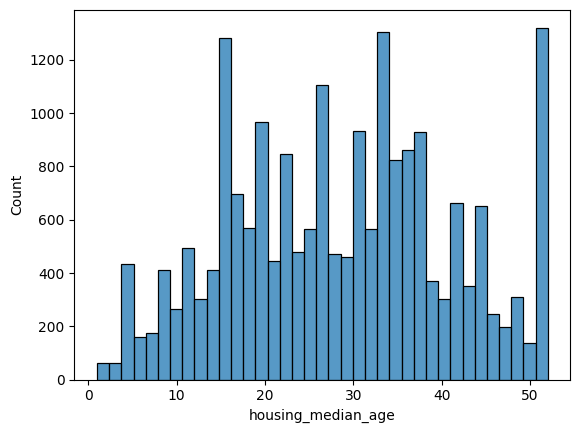

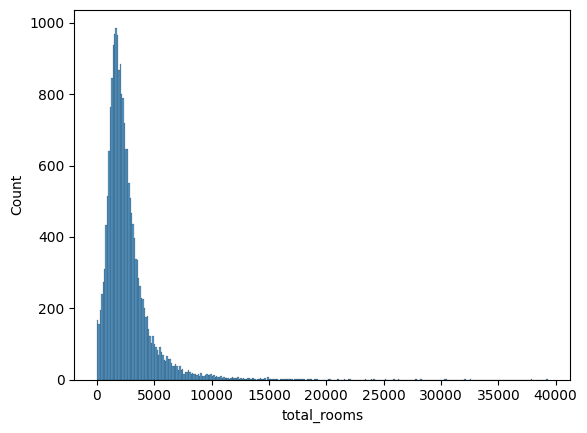

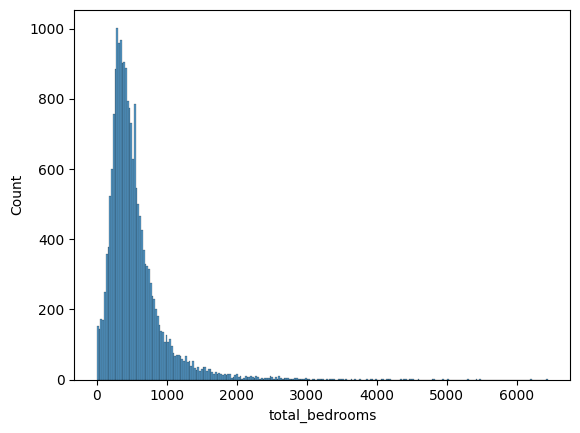

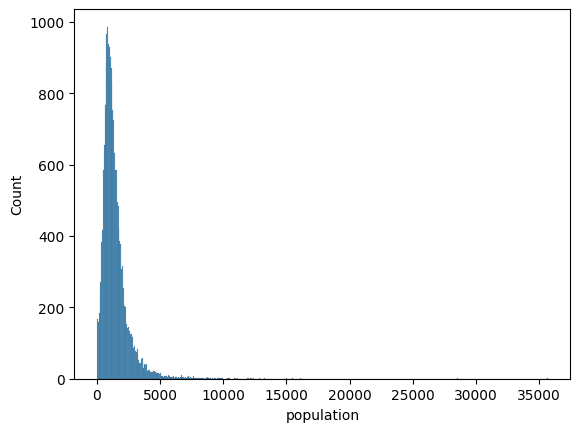

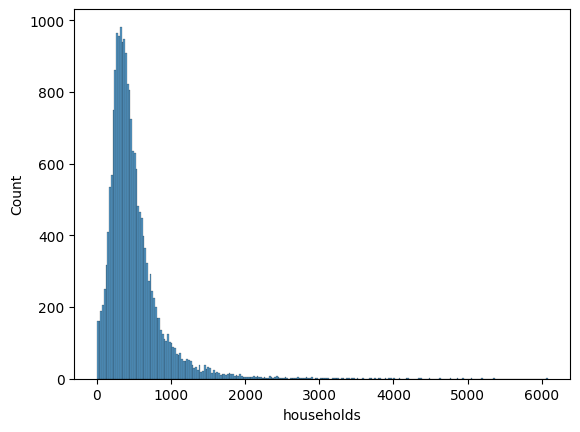

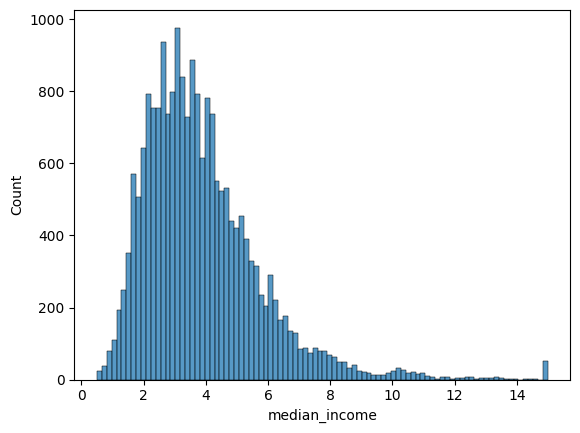

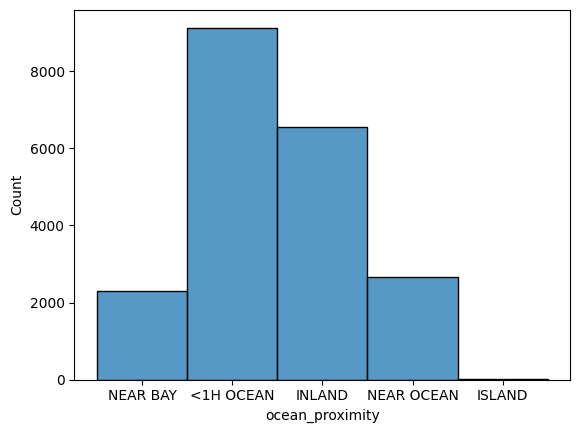

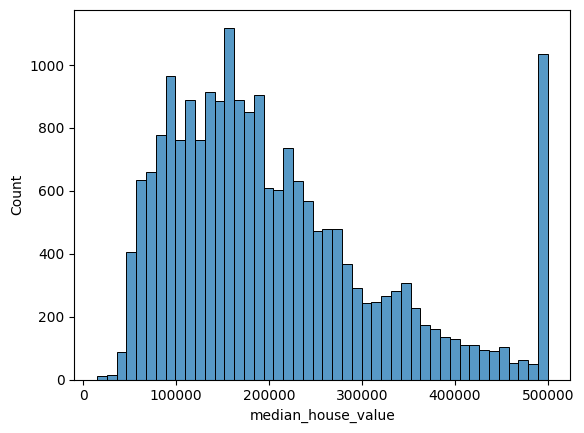

In [141]:
for i in columns:
    sns.histplot(df[i])
    plt.show()

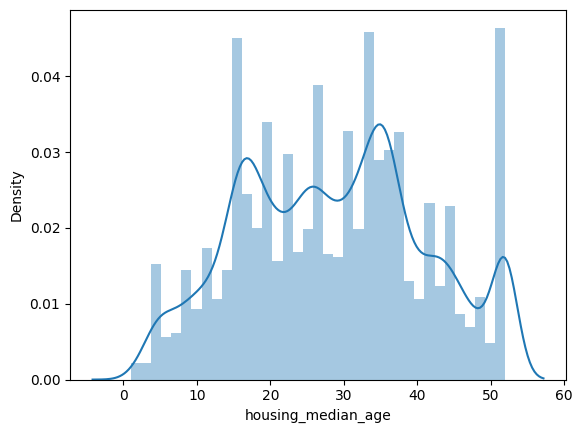

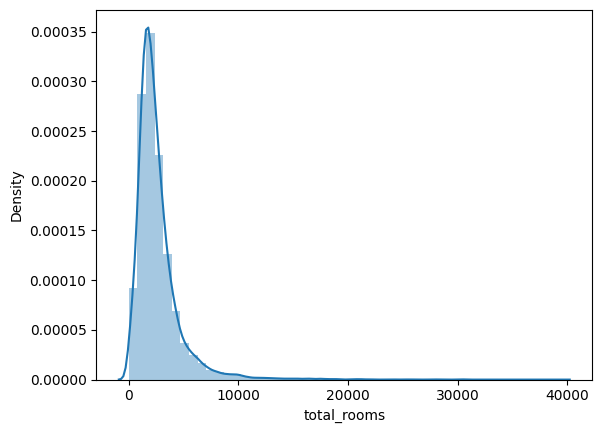

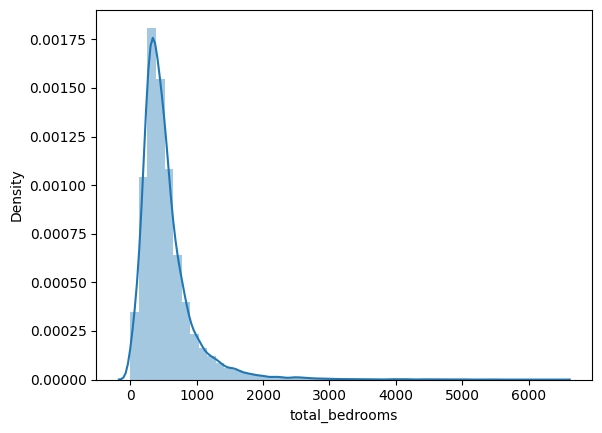

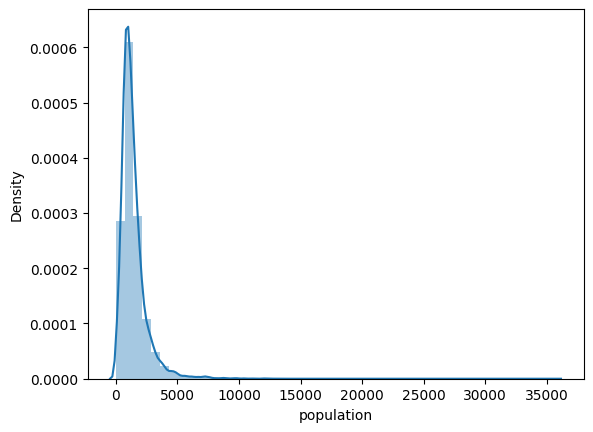

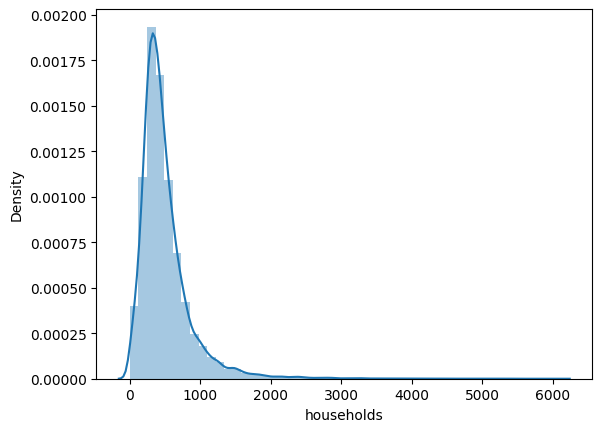

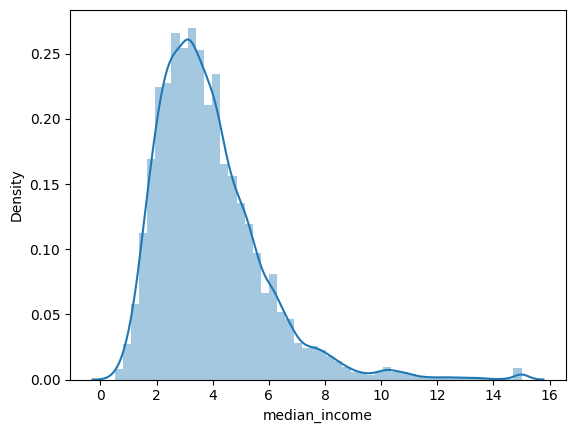

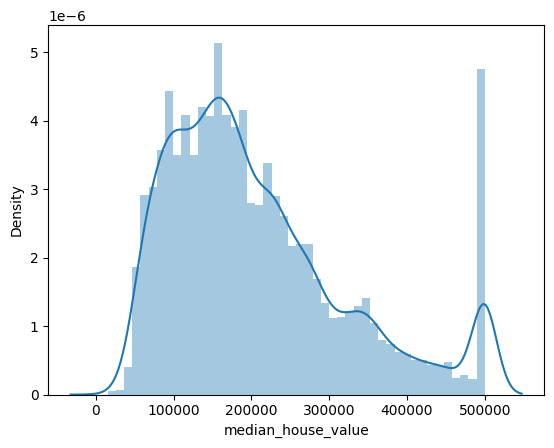

In [142]:
for i in coll:
    sns.distplot(df[i])
    plt.show()

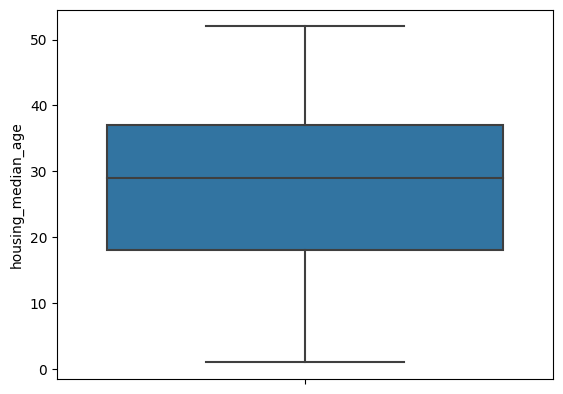

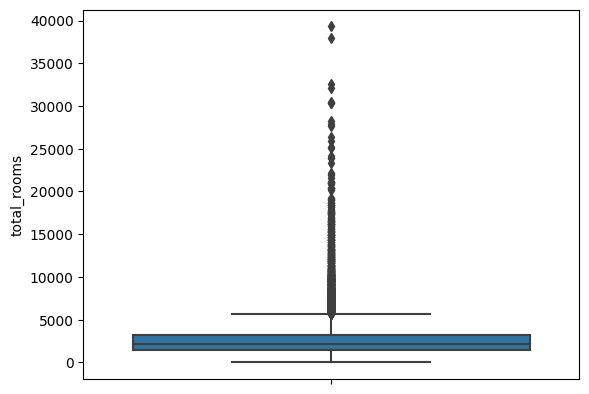

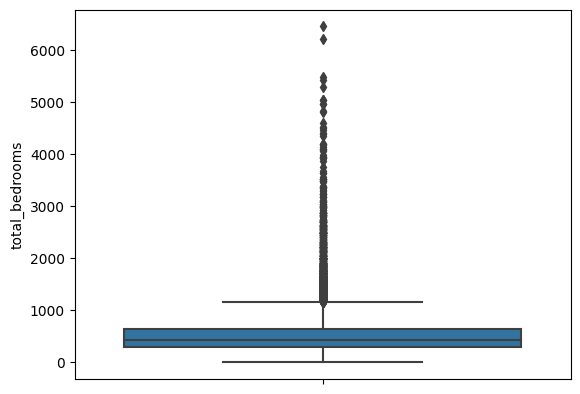

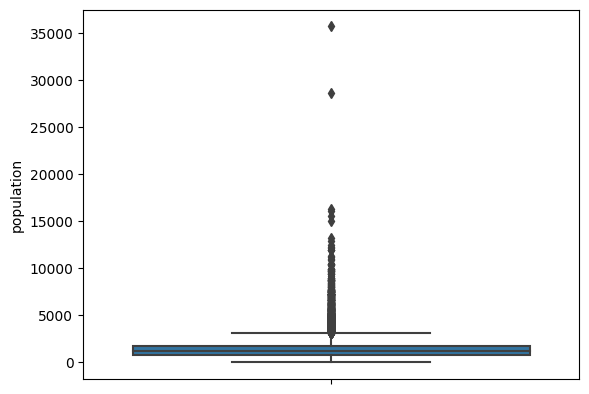

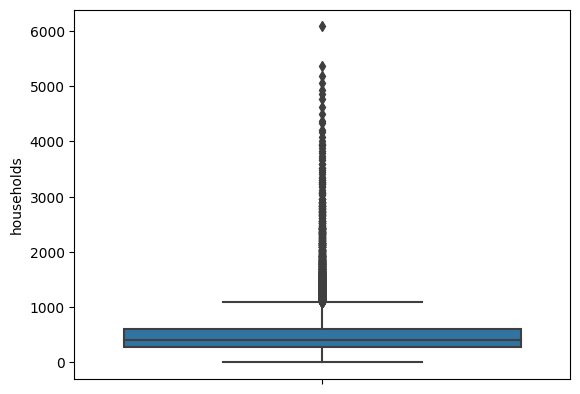

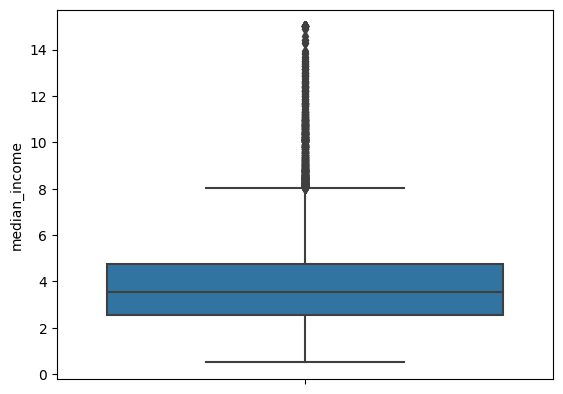

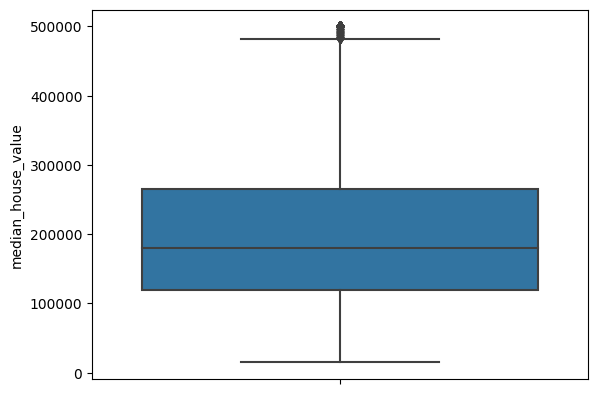

In [143]:
for i in coll:
    sns.boxplot(y=df[i])
    plt.show()

In [144]:
df[cat].value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
dtype: int64

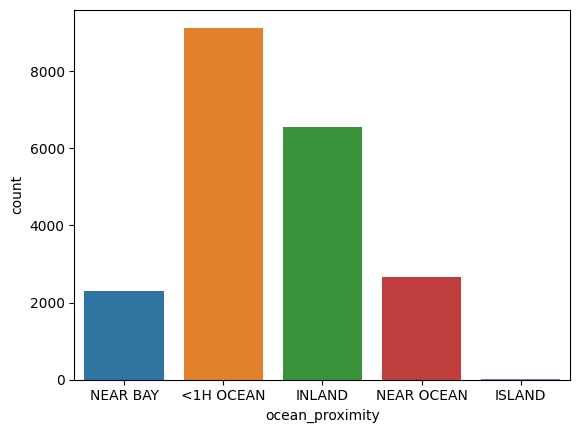

In [145]:
sns.countplot(x='ocean_proximity', data=df)
plt.show()

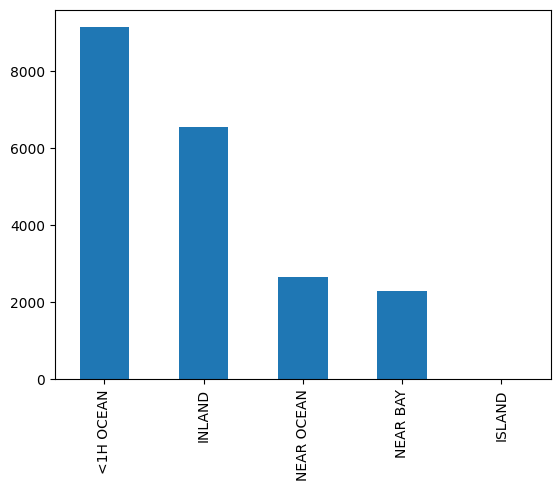

In [146]:
df['ocean_proximity'].value_counts().plot(kind='bar')
plt.show()

**Dado que los datos de Island son datos muy inferiores en comparación con otros valores, seran eliminados**

## Eliminando los valores atípicos:


In [147]:
dff = df[df['ocean_proximity'] != 'ISLAND']

In [148]:
dff

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...
20635,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,18,697,150.0,356,114,2.5568,INLAND,77100
20637,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,18,1860,409.0,741,349,1.8672,INLAND,84700


In [149]:
dff['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: ocean_proximity, dtype: int64

### Bivariado:

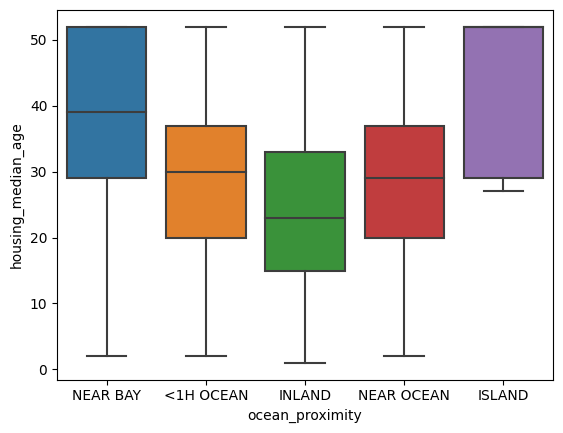

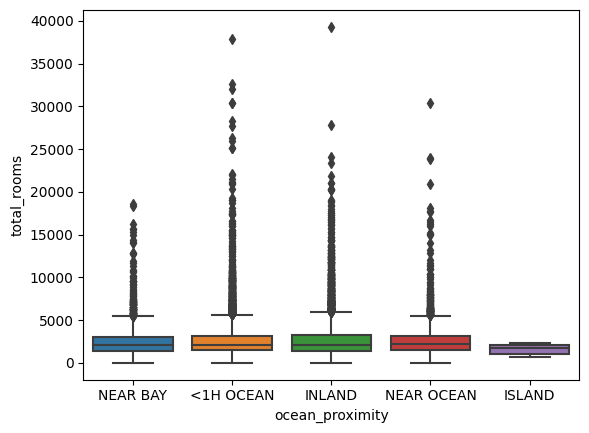

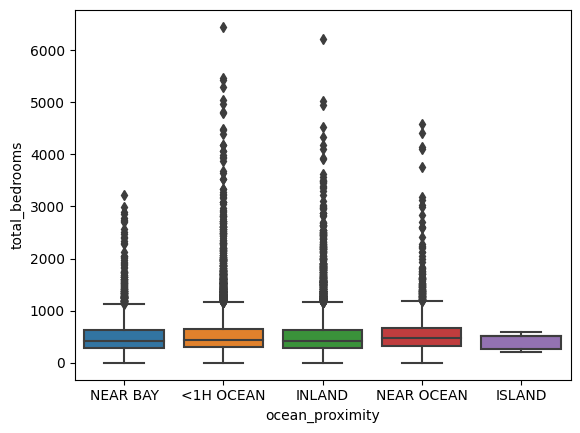

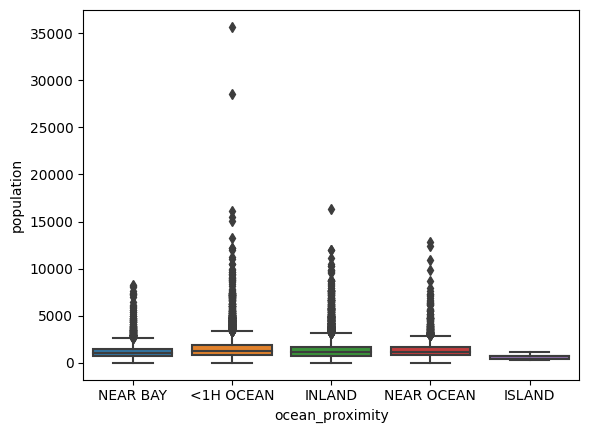

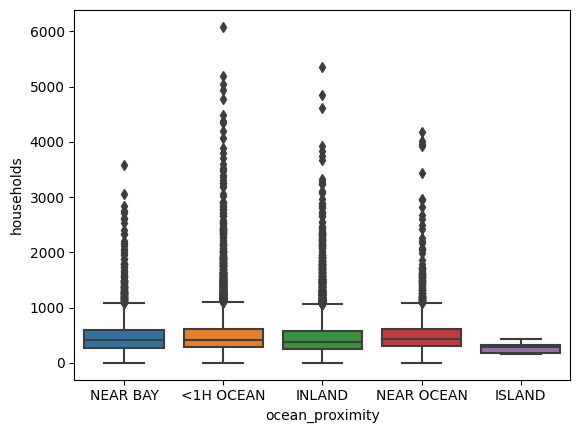

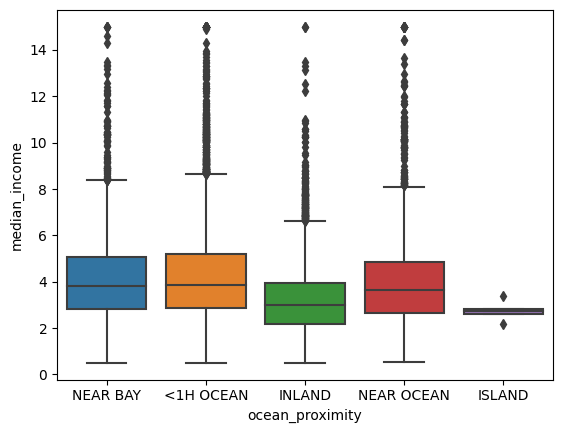

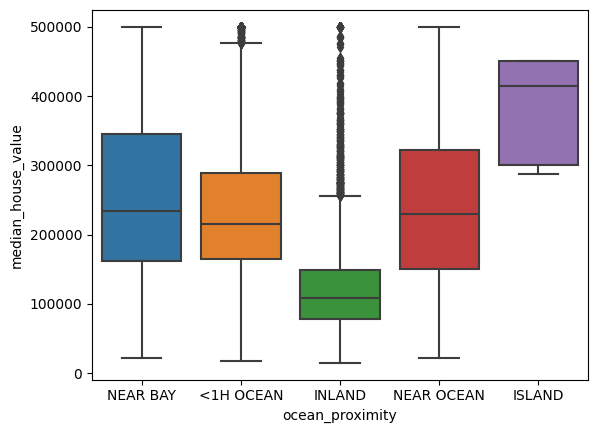

In [150]:
for i in coll:
    sns.boxplot(y=df[i],x=df['ocean_proximity'])
    plt.show()

In [151]:
c = ['households','total_rooms','total_bedrooms']

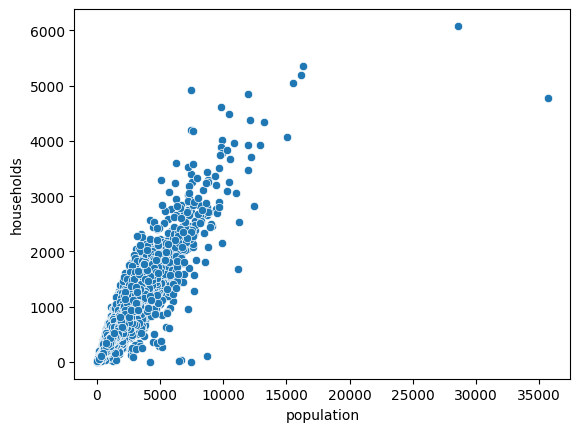

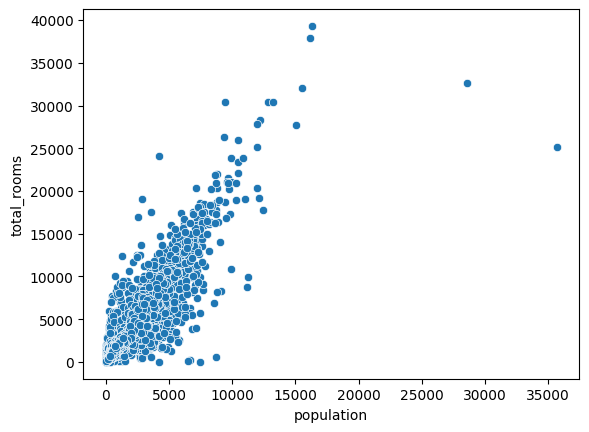

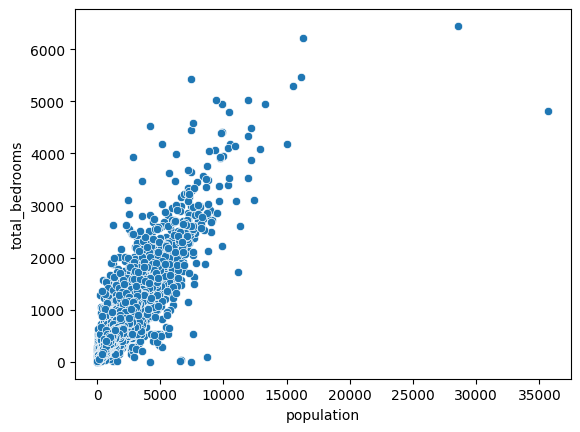

In [152]:
for i in c:
    sns.scatterplot(y=df[i],x=df['population'])
    plt.show()

In [153]:
ind = ['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [154]:
dep = ['median_house_value']

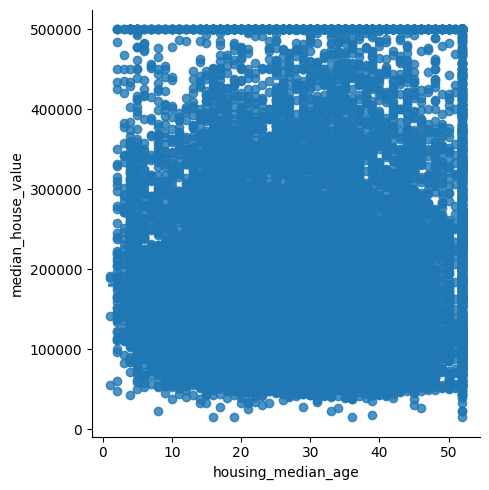

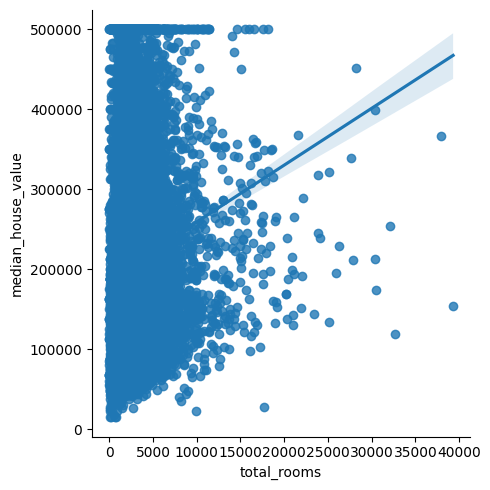

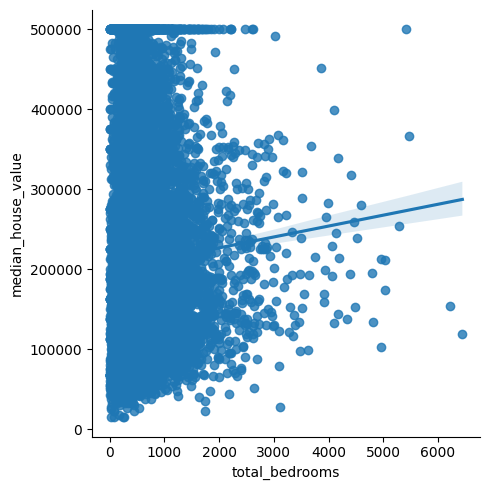

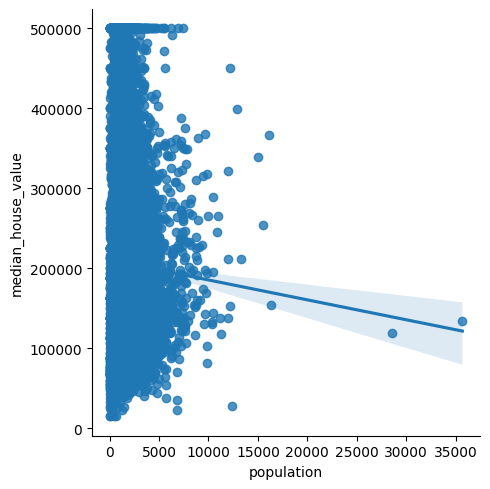

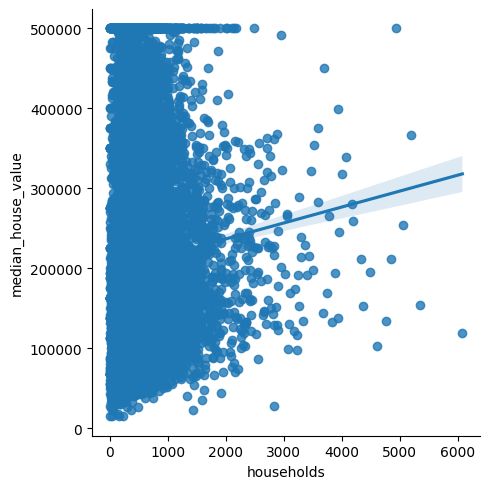

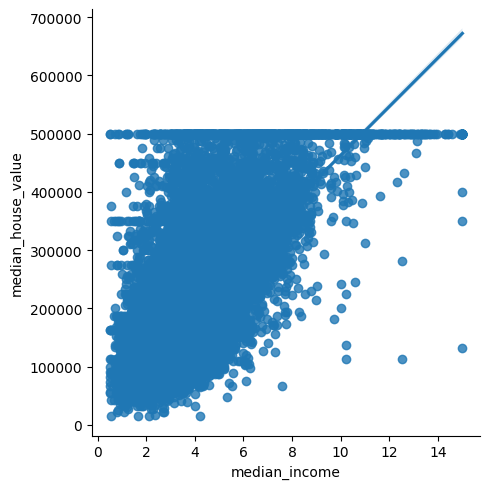

In [155]:
for i in ind:
    sns.lmplot(data=dff, x=i , y='median_house_value')
    plt.show()

### Multivariado:

In [156]:
coll

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

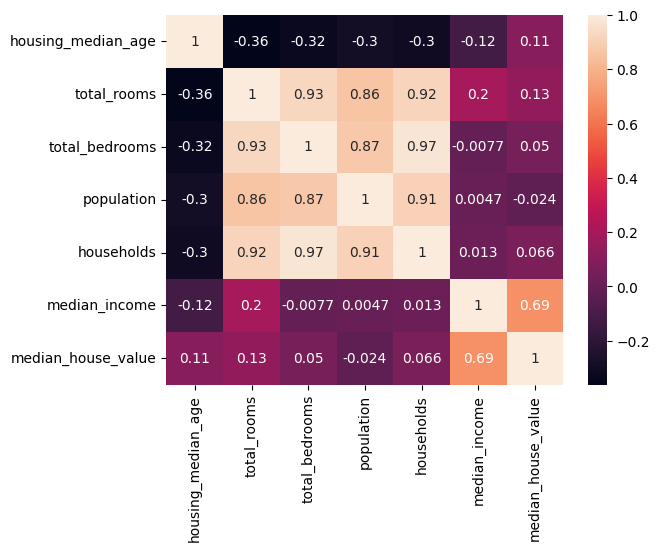

In [157]:
sns.heatmap(dff[coll].corr(),annot=True)
plt.show()

* Las columnas total_rooms, total_bedrooms, population y household son las columnas que están altamente correlacionadas
* Esto se puede reducir utilizando el factor de inflación de varianza (VIF)
* La columna mediana_ingresos tiene una buena correlación con el objetivo

## Transformación:

In [158]:
dff.skew()

housing_median_age    0.060234
total_rooms           4.147029
total_bedrooms        3.476972
population            4.935778
households            3.410186
median_income         1.646332
median_house_value    0.978449
dtype: float64

In [159]:
dff.kurt()

housing_median_age    -0.800617
total_rooms           32.625833
total_bedrooms        22.235360
population            73.549995
households            22.054909
median_income          4.951122
median_house_value     0.330317
dtype: float64

Except the housing_median_age column all others are highly skewed so we need to transform it

In [160]:
trans = ['total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [161]:
from sklearn.preprocessing import PowerTransformer

In [162]:
p = PowerTransformer(method='box-cox')
dff[trans] = p.fit_transform(dff[trans])

In [163]:
dff

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,-1.157712,-1.577308,-1.618528,-1.517265,1.916138,NEAR BAY,452600
1,21,1.896468,1.441961,1.089862,1.634411,1.909542,NEAR BAY,358500
2,52,-0.534757,-1.135987,-1.139252,-1.134301,1.601800,NEAR BAY,352100
3,52,-0.713784,-0.876725,-0.999890,-0.877616,1.035764,NEAR BAY,341300
4,52,-0.399781,-0.653427,-0.984911,-0.665734,0.197837,NEAR BAY,342200
...,...,...,...,...,...,...,...,...
20635,25,-0.369255,-0.264491,-0.476856,-0.343959,-1.662547,INLAND,78100
20636,18,-1.419369,-1.410002,-1.511485,-1.624094,-0.663105,INLAND,77100
20637,17,0.045973,0.107148,-0.239930,0.040296,-1.492226,INLAND,92300
20638,18,-0.220634,-0.139032,-0.647960,-0.266852,-1.304363,INLAND,84700


In [164]:
dff.isna().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [165]:
dff.skew()

housing_median_age    0.060234
total_rooms           0.123319
total_bedrooms        0.115053
population            0.113149
households            0.115985
median_income         0.004883
median_house_value    0.978449
dtype: float64

## Codificación:

In [166]:
df1 = pd.get_dummies(data=dff, columns = cat,drop_first=True)

In [167]:
df1

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41,-1.157712,-1.577308,-1.618528,-1.517265,1.916138,452600,0,1,0
1,21,1.896468,1.441961,1.089862,1.634411,1.909542,358500,0,1,0
2,52,-0.534757,-1.135987,-1.139252,-1.134301,1.601800,352100,0,1,0
3,52,-0.713784,-0.876725,-0.999890,-0.877616,1.035764,341300,0,1,0
4,52,-0.399781,-0.653427,-0.984911,-0.665734,0.197837,342200,0,1,0
...,...,...,...,...,...,...,...,...,...,...
20635,25,-0.369255,-0.264491,-0.476856,-0.343959,-1.662547,78100,1,0,0
20636,18,-1.419369,-1.410002,-1.511485,-1.624094,-0.663105,77100,1,0,0
20637,17,0.045973,0.107148,-0.239930,0.040296,-1.492226,92300,1,0,0
20638,18,-0.220634,-0.139032,-0.647960,-0.266852,-1.304363,84700,1,0,0


## Construcción del modelo:


In [168]:
df1

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41,-1.157712,-1.577308,-1.618528,-1.517265,1.916138,452600,0,1,0
1,21,1.896468,1.441961,1.089862,1.634411,1.909542,358500,0,1,0
2,52,-0.534757,-1.135987,-1.139252,-1.134301,1.601800,352100,0,1,0
3,52,-0.713784,-0.876725,-0.999890,-0.877616,1.035764,341300,0,1,0
4,52,-0.399781,-0.653427,-0.984911,-0.665734,0.197837,342200,0,1,0
...,...,...,...,...,...,...,...,...,...,...
20635,25,-0.369255,-0.264491,-0.476856,-0.343959,-1.662547,78100,1,0,0
20636,18,-1.419369,-1.410002,-1.511485,-1.624094,-0.663105,77100,1,0,0
20637,17,0.045973,0.107148,-0.239930,0.040296,-1.492226,92300,1,0,0
20638,18,-0.220634,-0.139032,-0.647960,-0.266852,-1.304363,84700,1,0,0


In [169]:
x = df1.drop(['median_house_value'],axis=1)
y = df1['median_house_value']

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=100)

In [172]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(14444, 9)
(14444,)
(6191, 9)
(6191,)


## Modelo base:


In [173]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import GridSearchCV

In [174]:
xtrainc = sm.add_constant(xtrain)
xtestc = sm.add_constant(xtest)

In [175]:
basemodel = sm.OLS(ytrain,xtrainc).fit()
basemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     2451.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:18:14   Log-Likelihood:            -1.8211e+05
No. Observations:               14444   AIC:                         3.642e+05
Df Residuals:                   14434   BIC:                         3.643e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.945e+05   1881.527    103.384      0.000    1.91e+05    1.98e+05
housing_median_age          1156.7568     54.700     21.147      0.000    1049.537    1263.976
total_rooms                -1.686e+04   2662.618     -6.332      0.000   -2.21e+04   -1.16e+04
total_bedrooms              3.096e+04   3157.183      9.807      0.000    2.48e+04    3.72e+04
population                 -6.048e+04   1644.910    -36.767      0.000   -6.37e+04   -5.73e+04
households                  4.816e+04   3215.420     14.977      0.000    4.19e+04    5.45e+04
median_income               7.241e+04    954.735     75.838      0.000    7.05e+04    7.43e+04
ocean_proximity_INLAND     -7.001e+04   1647.759    -42.487      0.000   -7.32e+04   -6.68e+04
ocean_proximity_NEAR BAY    1259.7952   2086.374      0.604      0.546   -2829.766    5349.357
ocean_proximity_NEAR OCEAN   1.03e+04   1921.633      5.358      0.000    6529.539    1.41e+04
==============================================================================
Omnibus:                     3101.866   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9362.367
Skew:                           1.111   Prob(JB):                         0.00
Kurtosis:                       6.259   Cond. No.                         219.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* El cuadrado R es 0,6, es decir, el 60 % del objetivo puede explicarse mediante las variables independientes
* El valor p de todas las columnas es 0, que es menor que 0,05, por lo que todas las columnas son significativas
* Por lo tanto, también verificamos la multicolinealidad.

### Comprueba la multicolinealidad usando VIF

In [176]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [177]:
col1 = xtrainc.columns.to_list()
col1

['const',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity_INLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN']

In [178]:
vif = [ VIF(xtrainc.values,i) for i in range(xtrainc.shape[1])]

In [179]:
vif_df = pd.DataFrame(vif,index=col1,columns=['VIF'])
vif_df.sort_values(by='VIF',ascending=False)

,VIF
households,29.036970
total_bedrooms,27.900273
total_rooms,19.818539
const,9.772517
population,7.584189
median_income,2.532366
ocean_proximity_INLAND,1.613604
housing_median_age,1.311950
ocean_proximity_NEAR BAY,1.206867
ocean_proximity_NEAR OCEAN,1.153040


**Elimina la columna hogares y luego verifique el VIF**

In [180]:
xtrainc1 = xtrainc.drop('households',axis=1)
xtestc1 = xtestc.drop('households',axis=1)

In [181]:
col2 = xtrainc1.columns.to_list()
col2

['const',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'median_income',
 'ocean_proximity_INLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN']

In [182]:
vif = [ VIF(xtrainc1.values,i) for i in range(xtrainc1.shape[1])]

In [183]:
vif_df = pd.DataFrame(vif,index=col2,columns=['VIF'])
vif_df.sort_values(by='VIF',ascending=False)

,VIF
total_rooms,19.297498
total_bedrooms,17.373498
const,9.762119
population,5.318374
median_income,2.527608
ocean_proximity_INLAND,1.579800
housing_median_age,1.305443
ocean_proximity_NEAR BAY,1.200260
ocean_proximity_NEAR OCEAN,1.151931


**Elimine la columna total_rooms y luego verifique el VIF**

In [184]:
xtrainc2 = xtrainc1.drop('total_rooms',axis=1)
xtestc2 = xtestc1.drop('total_rooms',axis=1)

In [185]:
col3 = xtrainc2.columns.to_list()
col3

['const',
 'housing_median_age',
 'total_bedrooms',
 'population',
 'median_income',
 'ocean_proximity_INLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN']

In [186]:
vif = [ VIF(xtrainc2.values,i) for i in range(xtrainc2.shape[1])]

In [187]:
vif_df = pd.DataFrame(vif,index=col3,columns=['VIF'])
vif_df.sort_values(by='VIF',ascending=False)

,VIF
const,9.696738
total_bedrooms,4.975667
population,4.925668
ocean_proximity_INLAND,1.349469
housing_median_age,1.301890
ocean_proximity_NEAR BAY,1.192190
ocean_proximity_NEAR OCEAN,1.146928
median_income,1.124039


Todos los valores de VIF son menos dhan 5, luego podemos continuar con el proceso adicional

In [188]:
model2 = sm.OLS(ytrain,xtrainc2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     3066.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:18:15   Log-Likelihood:            -1.8222e+05
No. Observations:               14444   AIC:                         3.645e+05
Df Residuals:                   14436   BIC:                         3.645e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.942e+05   1889.602    102.778      0.000    1.91e+05    1.98e+05
housing_median_age          1225.7157     54.937     22.311      0.000    1118.031    1333.400
total_bedrooms              5.168e+04   1344.224     38.447      0.000     4.9e+04    5.43e+04
population                 -4.849e+04   1336.504    -36.284      0.000   -5.11e+04   -4.59e+04
median_income               6.897e+04    641.299    107.553      0.000    6.77e+04    7.02e+04
ocean_proximity_INLAND     -7.604e+04   1519.242    -50.053      0.000    -7.9e+04   -7.31e+04
ocean_proximity_NEAR BAY    2896.9485   2090.670      1.386      0.166   -1201.033    6994.930
ocean_proximity_NEAR OCEAN  1.069e+04   1932.266      5.531      0.000    6900.224    1.45e+04
==============================================================================
Omnibus:                     2952.944   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8292.057
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       6.013   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [189]:
#### Metrices:

from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error

In [190]:
def met(name,key,arg):
    print('Name of the model: ',name)
    print('R-square of the model:',r2_score(key,arg))
    print('RMSE of the model:',np.sqrt(mean_squared_error(key,arg)))
    print('MAE of the model:',mean_absolute_error(key,arg))

## El modelo Sklearn:

In [191]:
lr = LinearRegression()

In [192]:
model3 = lr.fit(xtrainc2,ytrain)

In [193]:
ypred_tr= lr.predict(xtrainc2)
ypred_te= lr.predict(xtestc2)

In [194]:
met('Linear Regression model and result for Train',ytrain,ypred_tr)

Name of the model:  Linear Regression model and result for Train
R-square of the model: 0.5978535782252358
RMSE of the model: 72908.98374819747
MAE of the model: 54552.6413779733


In [195]:
lr.score(xtrainc2,ytrain)

0.5978535782252358

In [196]:
met('Linear Regression model and result for Test',ytest,ypred_te)

Name of the model:  Linear Regression model and result for Test
R-square of the model: 0.6118731429742899
RMSE of the model: 72447.82537084598
MAE of the model: 54741.8374391515


In [197]:
lr.score(xtestc2,ytest)

0.6118731429742899

## Modelo usando RFE:

In [198]:
from sklearn.feature_selection import RFE

In [199]:
rfe = RFE(estimator=lr)

In [200]:
model4 = rfe.fit(xtrainc2,ytrain)

In [201]:
rank = list(rfe.ranking_)
rank

[5, 4, 1, 1, 1, 1, 2, 3]

In [202]:
rfe_df = pd.DataFrame(rank,index=list(xtrainc2.columns))
rfe_df.sort_values(by=0)

,0
total_bedrooms,1
population,1
median_income,1
ocean_proximity_INLAND,1
ocean_proximity_NEAR BAY,2
ocean_proximity_NEAR OCEAN,3
housing_median_age,4
const,5


* Construyendo el modelo con columnas de rango 1

In [203]:
xtrainc3 = xtrainc2.drop(['ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN','housing_median_age','const'],axis=1)
xtestc3 = xtestc2.drop(['ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN','housing_median_age','const'],axis=1)

In [204]:
model5 = lr.fit(xtrainc3,ytrain)

In [205]:
ypred_rfe_tr = model5.predict(xtrainc3)
ypred_rfe_te = model5.predict(xtestc3)

In [206]:
met('RFE MODEL and result for train',ytrain,ypred_rfe_tr)

Name of the model:  RFE MODEL and result for train
R-square of the model: 0.5824866390952896
RMSE of the model: 74288.93448861217
MAE of the model: 55582.38046920335


In [207]:
met('RFE MODEL and result for train',ytest,ypred_rfe_te)

Name of the model:  RFE MODEL and result for train
R-square of the model: 0.5980832328337458
RMSE of the model: 73723.60584052585
MAE of the model: 55820.153452131555


## Modelo usando Regularización:

In [208]:
ridge = Ridge()
model6 = ridge.fit(xtrainc3,ytrain)

In [209]:
ypred_rtr = ridge.predict(xtrainc3)
ypred_rte = ridge.predict(xtestc3)

In [210]:
met('Ridge model and result for train',ytrain,ypred_rtr)

Name of the model:  Ridge model and result for train
R-square of the model: 0.5824866081652562
RMSE of the model: 74288.93724033152
MAE of the model: 55582.18481843219


In [211]:
met('Ridge model and result for test',ytest,ypred_rte)

Name of the model:  Ridge model and result for test
R-square of the model: 0.5980811634865708
RMSE of the model: 73723.79563049178
MAE of the model: 55819.78102595398


## Modelo utilizando el regresor del árbol de decisión:

In [212]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

In [213]:
dt = DecisionTreeRegressor(random_state=100)

In [214]:
model7 = dt.fit(xtrainc2,ytrain)

In [215]:
ypred_dt_tr = dt.predict(xtrainc2)
ypred_dt_te = dt.predict(xtestc2)

In [216]:
met('Decision Tree model and result for train',ytrain,ypred_dt_tr)

Name of the model:  Decision Tree model and result for train
R-square of the model: 1.0
RMSE of the model: 0.0
MAE of the model: 0.0


In [217]:
met('Decision tree model and result for train',ytest,ypred_dt_te)

Name of the model:  Decision tree model and result for train
R-square of the model: 0.45192873166285386
RMSE of the model: 86090.85561146754
MAE of the model: 59007.12178969472


## Modelo usando Bagging (Random Forest Regressor):

In [218]:
rf = RandomForestRegressor(random_state=100)

In [219]:
model8 = rf.fit(xtrainc2,ytrain)

In [220]:
ypred_rf_tr = rf.predict(xtrainc2)
ypred_rf_te = rf.predict(xtestc2)

In [221]:
met('Random Forest model and result for test',ytest,ypred_rf_te)

Name of the model:  Random Forest model and result for test
R-square of the model: 0.7028267026048308
RMSE of the model: 63393.30553034852
MAE of the model: 44641.102671620094


## Sintonización de hiperparámetros en el model8:

In [222]:
params = {'n_estimators' : [70,80,90],
          'max_depth' : [3,4,5],
           'min_samples_split':[2,3,4],
            'min_samples_leaf': [2,3,4]}

In [223]:
grid = GridSearchCV(estimator= rf , param_grid=params, cv=3, scoring='r2')

In [224]:
grid.fit(xtrainc2,ytrain)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=100),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [70, 80, 90]},
             scoring='r2')

In [225]:
grid.best_estimator_

RandomForestRegressor(max_depth=5, min_samples_leaf=2, n_estimators=80,
                      random_state=100)

In [226]:
grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 80}

## Modelo utilizando parámetros sintonizados

In [227]:
rft = RandomForestRegressor(max_depth =5,min_samples_leaf = 2,min_samples_split = 2,n_estimators =80,random_state=100)

In [228]:
rft.fit(xtrainc2,ytrain)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, n_estimators=80,
                      random_state=100)

In [229]:
ypred_rft_te =  rft.predict(xtestc2)

In [230]:
met('Tunned Random Forest model and result for test',ytest,ypred_rft_te)

Name of the model:  Tunned Random Forest model and result for test
R-square of the model: 0.6315882256704293
RMSE of the model: 70583.83599579406
MAE of the model: 50563.21651141159


El mejor modelo es Random Forest Regressor con un R-Cuadrado de 0.6315882256704293 equivalente al 63% objetivo.